In [128]:
import pandas as pd
from sklearn.feature_selection import RFECV
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler

In [129]:
df1= pd.read_excel(r'C:\Users\khana\Desktop\Datasets\Walworth County ACS Data 2019.xlsx', sheet_name='Demographics')
df2= pd.read_excel(r'C:\Users\khana\Desktop\Datasets\Walworth County ACS Data 2019.xlsx', sheet_name='Economics')
df3= pd.read_excel(r'C:\Users\khana\Desktop\Datasets\Walworth County ACS Data 2019.xlsx', sheet_name='Housing')
df4= pd.read_excel(r'C:\Users\khana\Desktop\Datasets\Walworth County ACS Data 2019.xlsx', sheet_name='Social')

In [130]:
df1=df1.drop(0, axis=0)
df2=df2.drop(0, axis=0)
df3=df3.drop(0, axis=0)
df4=df4.drop(0, axis=0)

In [131]:
df=pd.concat((df1,df2,df3,df4),ignore_index=True)
df

,Unnamed: 0,"Bloomfield village, Walworth County, Wisconsin",Unnamed: 2,Unnamed: 3,Unnamed: 4,"Bloomfield town, Walworth County, Wisconsin",Unnamed: 6,Unnamed: 7,Unnamed: 8,"Burlington city, Walworth County, Wisconsin",...,Unnamed: 119,Unnamed: 120,Wisconsin,Unnamed: 122,Unnamed: 123,Unnamed: 124,"Walworth County, Wisconsin",Unnamed: 126,Unnamed: 127,Unnamed: 128
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,4708,±17,4708,(X),1508,±262,1508,(X),7,...,2604,(X),5790716,*****,5790716,(X),103074,*****,103074,(X)
2,Male,2520,±199,0.535,±4.2,725,±145,0.481,±3.8,0,...,0.475,±3.2,2879894,±833,0.497,±0.1,51443,±115,0.499,±0.1
3,Female,2188,±200,0.465,±4.2,783,±141,0.519,±3.8,7,...,0.525,±3.2,2910822,±833,0.503,±0.1,51631,±115,0.501,±0.1
4,Sex ratio (males per 100 females),115.2,±19.5,(X),(X),92.6,±14.2,(X),(X),-,...,(X),(X),98.9,±0.1,(X),(X),99.6,±0.4,(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,West Indian (excluding Hispanic origin groups),0,±9,0,±0.4,0,±9,0,±1.2,0,...,0,±0.7,6119,±772,0.001,±0.1,61,±66,0.001,±0.1
566,COMPUTERS AND INTERNET USE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,Total households,1528,±170,1528,(X),558,±93,558,(X),7,...,1129,(X),2358156,"±7,031",2358156,(X),40874,±573,40874,(X)
568,With a computer,1374,±185,0.899,±5.8,507,±88,0.909,±5.1,0,...,0.918,±3.7,2107224,"±7,140",0.894,±0.1,37201,±589,0.91,±0.8


In [132]:
 def dataclean(X):
       
        X=X.T
        column=X.iloc[0]
        X.columns=column
        pattern=r'^Unnamed:\s\d{1,3}'
        for i in X.index.astype(str):
            m=re.findall(pattern, i)
            if bool(m):
                X=X.drop(i, axis=0)
        for columns in X.columns:
            if X[columns].isnull().values.any():
                X=X.drop(columns, axis=1)
        X = X.loc[:,~X.columns.duplicated()]
        for i in X.columns:
            des=X[i].describe()
            if (des.loc['top']=='(X)'):
                X=X.drop(i,axis=1)
        for i in df.columns:
            try:
                df[i]=df[i].astype(float)
            except:
                pass
        X=X.replace(to_replace=r'^\D', value= 0,regex=True)
        X=X.astype(float)
        return X
    

In [133]:
df=dataclean(df)

In [134]:
df

Unnamed: 0,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,...,Scottish,Slovak,Subsaharan African,Swedish,Swiss,Ukrainian,Welsh,West Indian (excluding Hispanic origin groups),With a computer,With a broadband Internet subscription
"Bloomfield village, Walworth County, Wisconsin",4708.0,2520.0,2188.0,115.2,228.0,386.0,450.0,539.0,215.0,548.0,...,7.0,0.0,0.0,204.0,21.0,37.0,43.0,0.0,1374.0,1346.0
"Bloomfield town, Walworth County, Wisconsin",1508.0,725.0,783.0,92.6,105.0,61.0,130.0,139.0,64.0,184.0,...,12.0,0.0,13.0,84.0,6.0,0.0,10.0,0.0,507.0,492.0
"Burlington city, Walworth County, Wisconsin",7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Darien village, Walworth County, Wisconsin",1704.0,867.0,837.0,103.6,114.0,158.0,106.0,128.0,72.0,284.0,...,33.0,0.0,3.0,42.0,6.0,12.0,10.0,0.0,505.0,480.0
"Darien town, Walworth County, Wisconsin",1924.0,993.0,931.0,106.7,107.0,152.0,153.0,127.0,55.0,203.0,...,11.0,0.0,4.0,39.0,7.0,0.0,3.0,0.0,583.0,528.0
"Delavan city, Walworth County, Wisconsin",8303.0,4082.0,4221.0,96.7,416.0,714.0,647.0,401.0,524.0,1361.0,...,194.0,0.0,38.0,298.0,34.0,61.0,65.0,0.0,2950.0,2660.0
"Delavan town, Walworth County, Wisconsin",5313.0,2661.0,2652.0,100.3,247.0,239.0,220.0,252.0,259.0,507.0,...,62.0,24.0,0.0,328.0,18.0,9.0,61.0,0.0,2001.0,1781.0
"East Troy village, Walworth County, Wisconsin",4316.0,2041.0,2275.0,89.7,223.0,229.0,348.0,272.0,244.0,422.0,...,203.0,0.0,8.0,86.0,27.0,17.0,34.0,0.0,1652.0,1546.0
"East Troy town, Walworth County, Wisconsin",4044.0,1945.0,2099.0,92.7,205.0,202.0,193.0,301.0,222.0,322.0,...,43.0,27.0,0.0,151.0,37.0,0.0,23.0,0.0,1496.0,1427.0
"Elkhorn city, Walworth County, Wisconsin",9925.0,4735.0,5190.0,91.2,634.0,635.0,757.0,525.0,753.0,1311.0,...,152.0,26.0,8.0,260.0,13.0,0.0,114.0,0.0,3584.0,3378.0


In [135]:
def feature_sel(df):
    corr=df.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.99:
                if columns[j]:
                    columns[j] = False
    selected_columns = df.columns[columns]
    df = df[selected_columns]
    return df

In [136]:
df=feature_sel(df)

In [137]:
# listt=[]
# # for column in corr.columns:
# # try: 
# i=-1
# for value in corr.iloc[3]:
#     i+=1
#     col_name=df.columns[i]
#     if (value>0.99)and (col_name !='Employed'):
#         listt.append (df.columns[i])
# #         i+=1
# #         if (value>0.99) and (value!=1):
# #             df=df.drop(df.index[i])
# # # except:
# #     pass
# df=df.drop(listt, axis=1)

In [138]:
df.shape

(32, 32)

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>

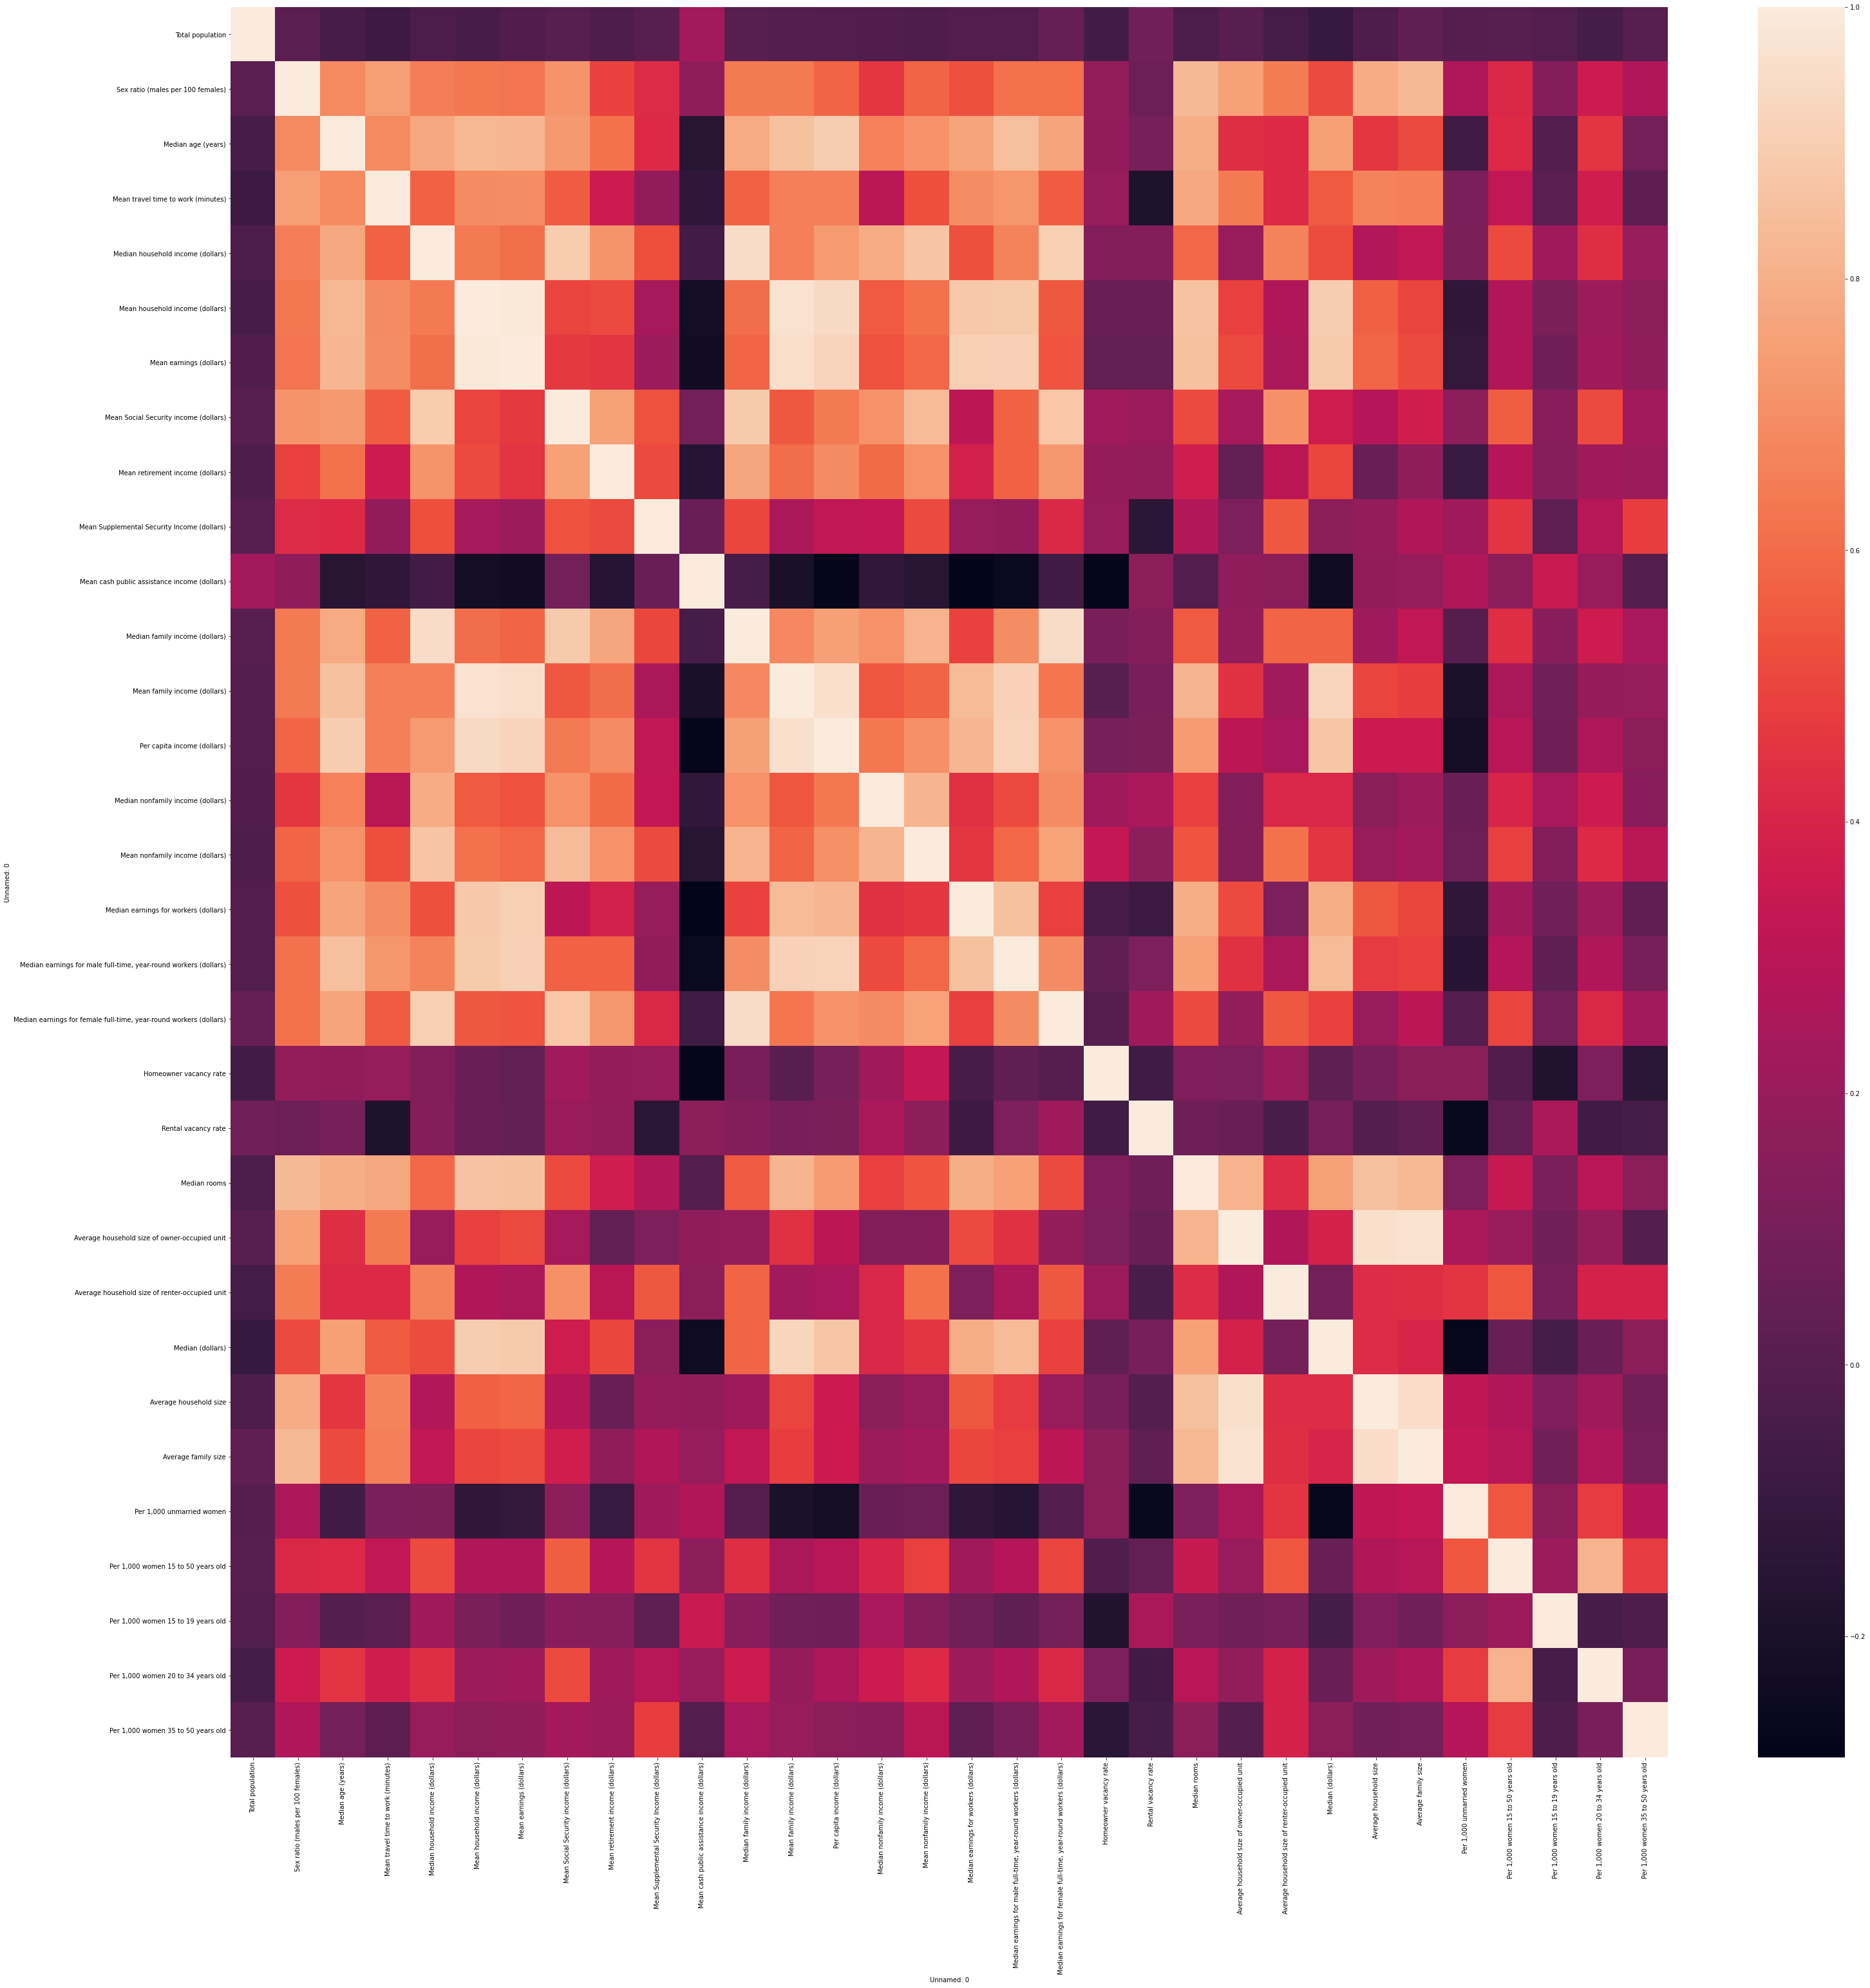

In [140]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr())

In [141]:
df=df.drop(['Wisconsin','Walworth County, Wisconsin'], axis=0)

In [146]:
from sklearn.preprocessing import normalize

In [150]:
df1=normalize(df)

In [151]:
df1 = pd.DataFrame(df1,index=df.index, columns=df.columns)

In [152]:
df1

Unnamed: 0,Total population,Sex ratio (males per 100 females),Median age (years),Mean travel time to work (minutes),Median household income (dollars),Mean household income (dollars),Mean earnings (dollars),Mean Social Security income (dollars),Mean retirement income (dollars),Mean Supplemental Security Income (dollars),...,Average household size of owner-occupied unit,Average household size of renter-occupied unit,Median (dollars),Average household size,Average family size,"Per 1,000 unmarried women","Per 1,000 women 15 to 50 years old","Per 1,000 women 15 to 19 years old","Per 1,000 women 20 to 34 years old","Per 1,000 women 35 to 50 years old"
"Bloomfield village, Walworth County, Wisconsin",0.019069,0.000467,0.000139,0.000126,0.274194,0.285470,0.275458,0.092274,0.086118,0.053351,...,0.000011,0.000017,0.683692,0.000012,0.000013,0.000336,0.000186,0.000000,0.000547,0.000000
"Bloomfield town, Walworth County, Wisconsin",0.006032,0.000370,0.000156,0.000117,0.231110,0.327981,0.326537,0.085411,0.078995,0.055711,...,0.000011,0.000012,0.598394,0.000011,0.000012,0.000268,0.000368,0.000000,0.000784,0.000244
"Burlington city, Walworth County, Wisconsin",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Darien village, Walworth County, Wisconsin",0.006551,0.000398,0.000133,0.000093,0.281913,0.324181,0.301369,0.085282,0.075925,0.040273,...,0.000011,0.000013,0.584716,0.000011,0.000012,0.000235,0.000308,0.000715,0.000384,0.000088
"Darien town, Walworth County, Wisconsin",0.006039,0.000335,0.000135,0.000057,0.241427,0.281676,0.283365,0.061745,0.078564,0.067049,...,0.000008,0.000014,0.694876,0.000009,0.000010,0.000355,0.000323,0.000000,0.000461,0.000367
"Delavan city, Walworth County, Wisconsin",0.037591,0.000438,0.000163,0.000092,0.242159,0.277039,0.288846,0.081974,0.106947,0.054873,...,0.000012,0.000010,0.656027,0.000011,0.000014,0.000000,0.000018,0.000000,0.000041,0.000000
"Delavan town, Walworth County, Wisconsin",0.019214,0.000363,0.000181,0.000089,0.225867,0.286955,0.263557,0.072580,0.099826,0.051526,...,0.000009,0.000007,0.676622,0.000008,0.000010,0.000000,0.000224,0.000000,0.000597,0.000000
"East Troy village, Walworth County, Wisconsin",0.014564,0.000303,0.000139,0.000088,0.237526,0.276384,0.257301,0.077110,0.161290,0.051468,...,0.000008,0.000007,0.646888,0.000008,0.000010,0.000115,0.000148,0.000000,0.000429,0.000000
"East Troy town, Walworth County, Wisconsin",0.009669,0.000222,0.000113,0.000066,0.201401,0.226404,0.211475,0.045845,0.069136,0.039526,...,0.000006,0.000005,0.797400,0.000006,0.000007,0.000000,0.000055,0.000000,0.000067,0.000074
"Elkhorn city, Walworth County, Wisconsin",0.039603,0.000364,0.000149,0.000086,0.217366,0.257275,0.274050,0.079752,0.083160,0.040808,...,0.000011,0.000008,0.705066,0.000010,0.000012,0.000327,0.000303,0.000000,0.000559,0.000108


In [ ]:
## Normalizing/ MinMaxScaling dataset to feature select using variance
# scaler = MinMaxScaler().fit(df)

In [ ]:
# df1=scaler.transform(df)

In [ ]:
# df1

In [ ]:
# df1 = pd.DataFrame(df1, index=df.index, columns=df.columns)

In [ ]:
# df1

In [153]:
df1.var()

Unnamed: 0
Total population                                                      3.265065e-02
Sex ratio (males per 100 females)                                     9.374671e-09
Median age (years)                                                    1.133170e-09
Mean travel time to work (minutes)                                    6.618029e-10
Median household income (dollars)                                     4.006675e-03
Mean household income (dollars)                                       3.174709e-03
Mean earnings (dollars)                                               3.074195e-03
Mean Social Security income (dollars)                                 4.561446e-04
Mean retirement income (dollars)                                      9.394995e-04
Mean Supplemental Security Income (dollars)                           3.139620e-04
Mean cash public assistance income (dollars)                          2.308236e-05
Median family income (dollars)                                        4.9638

In [ ]:
# df1=df1.drop('Wisconsin', axis=0)